<a href="https://colab.research.google.com/github/Abishethvarman/ML-Models/blob/main/topic_modelling_kii_fisheries_LDA%2Ball%2Bvisualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install transformers
!pip install wordcloud pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [34]:
pip install python-docx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [35]:
import pandas as pd
import nltk
import torch
import numpy as np
import matplotlib.pyplot as plt
import string
import pyLDAvis
import pyLDAvis.lda_model
import plotly.express as px
from nltk.util import bigrams
from collections import Counter
from gensim.corpora import Dictionary
from sklearn.manifold import TSNE
from docx import Document
import csv
import os
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

%cd /mydrive/dataset/

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 17APC3292
'17APC3292 (1).pdf'
'17APC3292 (2).pdf'
'17APC3292 (3).pdf'
'17APC3292 (4).pdf'
'17APC3292 CA 2.m4a'
 17APC3292.docx
 17APC3292..docx
'17APC3292_final report _AMS.pdf'
'17APC3292_Form A.pdf'
'17APC3292_Form B_Signed.pdf'
'17APC3292_Form C-1.pdf'
'17APC3292_Form C-2.pdf'
'17APC3292_Form C-3.pdf'
'17APC3292_Form C-4.pdf'
'17APC3292_Form E (1).pdf'
'17APC3292_Form E.pdf'
 17APC3292_Industrial_Training_Presentation_V2_AV.pptx
 17APC3292_Industrial_Training_Report.pdf
 17APC3292_IS31229_Assignment.docx.pdf
'17APC3292_Mini Project final presentation template.pptx'
 17APC3292_Mini_Project_Final_Presentation_Trim.mp4
'17APC3292 - Mini Project Project Progress Journal 2021_editable_Forth phase AMS.pdf'
'17APC3292 - Mini Project Project Progress Journal 2021_editable_second phase MS.pdf'
'

In [37]:
pwd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'/content/gdrive/My Drive/dataset'

In [38]:
input_docx_path = '/content/gdrive/MyDrive/dataset/KII-Fisheries.docx'
output_csv_path = '/content/gdrive/MyDrive/dataset/KII-Fisheries.csv'

doc = Document(input_docx_path)

with open(output_csv_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for para in doc.paragraphs:

        lines = para.text.split('\n')

        for line in lines:
            csvwriter.writerow([line])

print(f"Conversion complete! The CSV file is saved at: {output_csv_path}")

Conversion complete! The CSV file is saved at: /content/gdrive/MyDrive/dataset/KII-Fisheries.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [39]:
data = pd.read_csv("KII-Fisheries.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [40]:
row_count = data.shape[0]
print("Total lines:", row_count)

Total lines: 38


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [41]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,text
0,"Mr. S. Nishan,Director,Inland Fisheries Unit, ..."
1,The current data from 2024 indicates that appr...
2,"Women are members of fishing societies, but th..."
3,"However, women do participate in other aspects..."
4,Our operations are constrained by limited gove...
5,"Despite these challenges, our inland fish prov..."
6,To enhance inland fishing in the Northern Prov...
7,I recommend conducting research to address spe...
8,NaN
9,NaN


In [42]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,text
0,"Mr. S. Nishan,Director,Inland Fisheries Unit, ..."
1,The current data from 2024 indicates that appr...
2,"Women are members of fishing societies, but th..."
3,"However, women do participate in other aspects..."
4,Our operations are constrained by limited gove...


In [43]:
# Preprocessing function
def preprocess_text(text):
    if isinstance(text, str):  # Check if the input is a string
        text = text.lower()

        # Tokenization
        tokens = word_tokenize(text)

        # Remove punctuation and special characters
        tokens = [token for token in tokens if token not in string.punctuation]

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        custom_stopwords = ["mr",'sri','lanka',"approximately", "more", "good", "one", "two", "via", "gt", "gpt", "chatgpt", "gpt3", "text", "like", "http", "https", "nft", "job", "ai", "bot", "twitter", "openai", "software", "developer", "robot", "service", "cgpt", "gpt4", "new", "chat", "machinelearning", "artificialintelligence", "llm", "api"]

        stop_words.update(custom_stopwords)

        tokens = [token for token in tokens if token not in stop_words and token.isalpha()]

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Reconstruct text
        processed_text = ' '.join(tokens)
        return processed_text
    else:
        return ""  # Return an empty string if the input is not a valid text

# Apply preprocessing to dataset
data['processed_text'] = data['text'].apply(preprocess_text)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [44]:
# Apply preprocessing to dataset
data['processed_text'] = data['text'].apply(preprocess_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [45]:
# Feature extraction - CountVectorizer
vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the text data
X = vectorizer.fit_transform(data['processed_text'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [46]:
# Apply LDA
num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
topic_matrix = lda_model.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [47]:
# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    # top_words = [vectorizer.get_feature_names()[i] for i in top_words_idx]
    print(f"Topic {topic_idx}:")
    print(top_words)


Topic 0:
['product', 'value', 'fishery', 'woman', 'fish', 'society', 'program', 'including', 'chain', 'dry']
Topic 1:
['opportunity', 'government', 'impact', 'fisherman', 'practice', 'fishing', 'often', 'system', 'economic', 'increased']
Topic 2:
['support', 'fishery', 'financial', 'fisherman', 'fishing', 'fish', 'product', 'value', 'training', 'challenge']
Topic 3:
['scientific', 'method', 'hygiene', 'proper', 'condition', 'drying', 'hygienic', 'lack', 'insufficient', 'limited']
Topic 4:
['fishing', 'product', 'inland', 'due', 'woman', 'district', 'cultural', 'challenge', 'tank', 'fish']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



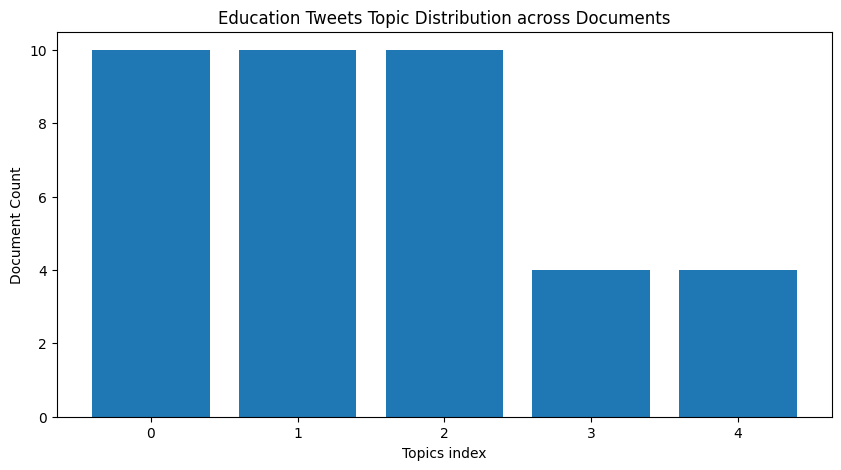

In [48]:
topic_distribution = topic_matrix.argmax(axis=1)
topic_counts = np.bincount(topic_distribution)

plt.figure(figsize=(10, 5))
plt.bar(range(len(topic_counts)), topic_counts)
plt.xlabel('Topics index')
plt.ylabel('Document Count')
plt.title('Education Tweets Topic Distribution across Documents')
plt.show()

In [51]:
import plotly.express as px

num_words = 10

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-num_words:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    word_importance = np.exp(topic[top_words_idx])

    # Create an interactive bar plot using Plotly
    fig = px.bar(x=word_importance, y=top_words, orientation='h', title=f"Topic {topic_idx} - Key Words")
    fig.update_layout(xaxis_title="Word Importance", yaxis_title="Words")
    fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [52]:
num_words = 10  # Number of most used words to display

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-num_words:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    word_importance = np.exp(topic[top_words_idx])

    # Create an interactive bar plot using Plotly
    fig = px.bar(x=word_importance, y=top_words, orientation='h', title=f"Topic {topic_idx} - Most Used Words")

    # Add color and hover data
    fig.update_traces(marker_color='blue', hovertemplate='%{x:.2f}', hoverinfo='x+y')

    # Add annotations for the highest word importance
    max_importance = max(word_importance)
    max_idx = word_importance.argmax()
    fig.add_annotation(x=max_importance, y=top_words[max_idx], text=f'Max Importance: {max_importance:.2f}', showarrow=True)

    # Customize layout
    fig.update_layout(
        xaxis_title="Word Importance",
        yaxis_title="Words",
        font=dict(family="Arial", size=12),
        title_font=dict(size=16),
        plot_bgcolor='white'
    )

    fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



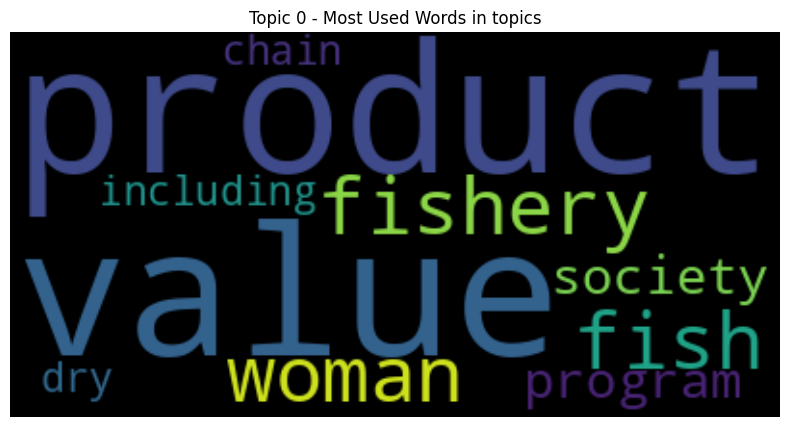

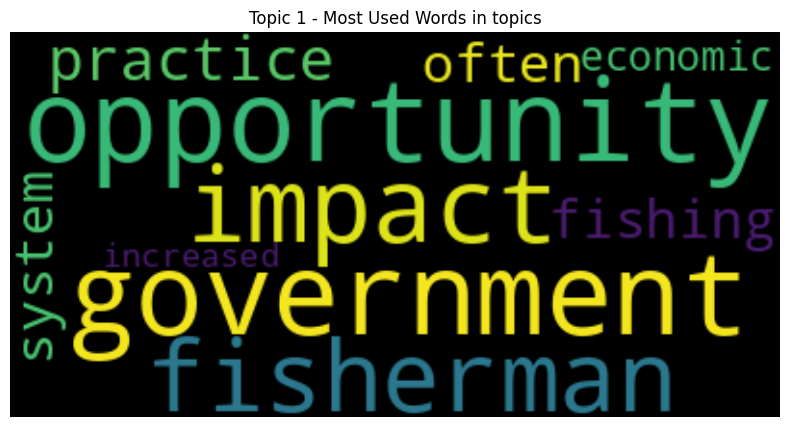

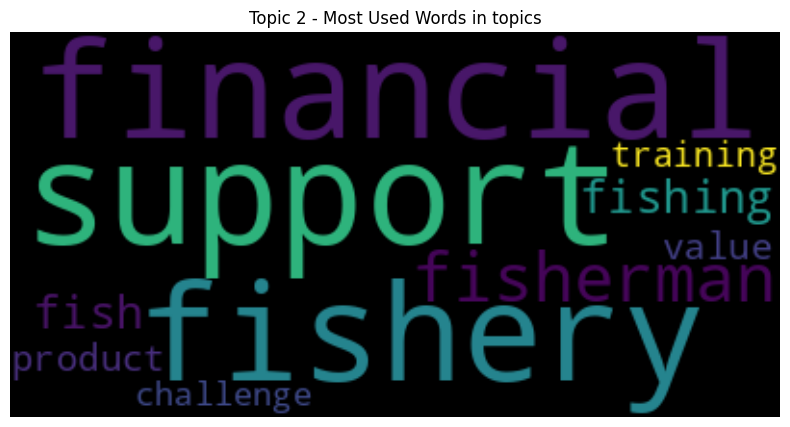

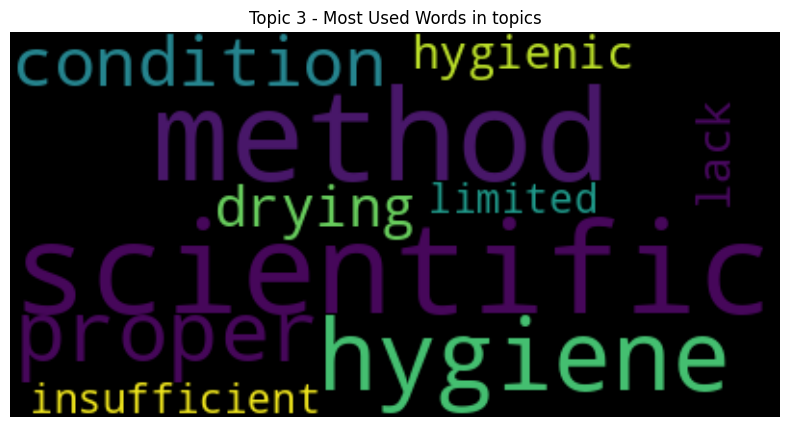

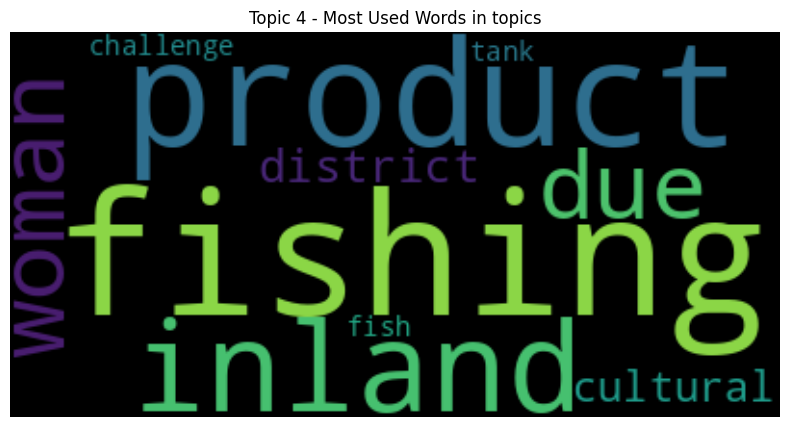

In [53]:
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topic_words = ' '.join(top_words)

    wordcloud = WordCloud(width=400, height=200, background_color='black').generate(topic_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic_idx} - Most Used Words in topics")
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(-1.0999995786330337,
 1.0999996247258035,
 -1.0999993518000597,
 1.0999998373090218)

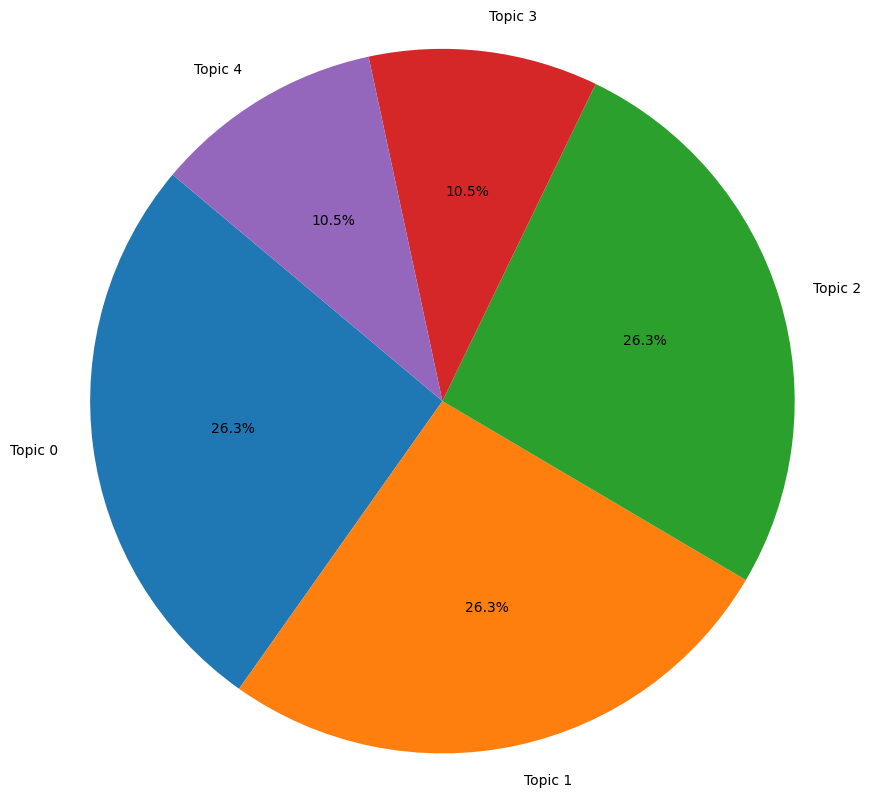

In [54]:

total_documents = len(data)
topic_distribution = topic_matrix.argmax(axis=1)
topic_counts = np.bincount(topic_distribution, minlength=num_topics)

plt.figure(figsize=(10, 10))
plt.pie(topic_counts, labels=[f"Topic {i}" for i in range(num_topics)], autopct="%1.1f%%", startangle=140)
plt.axis("equal")

In [55]:
processed_text = data['processed_text'].apply(lambda x: x.split())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [56]:
dictionary = Dictionary(processed_text)
corpus = [dictionary.doc2bow(text) for text in processed_text]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [57]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(lda_model, X, vectorizer)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [58]:
output_html_path = "kii-fisheries-ldaviz.html"
pyLDAvis.save_html(vis, output_html_path)


print(f"Visualization saved as {output_html_path}")

Visualization saved as kii-fisheries-ldaviz.html


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



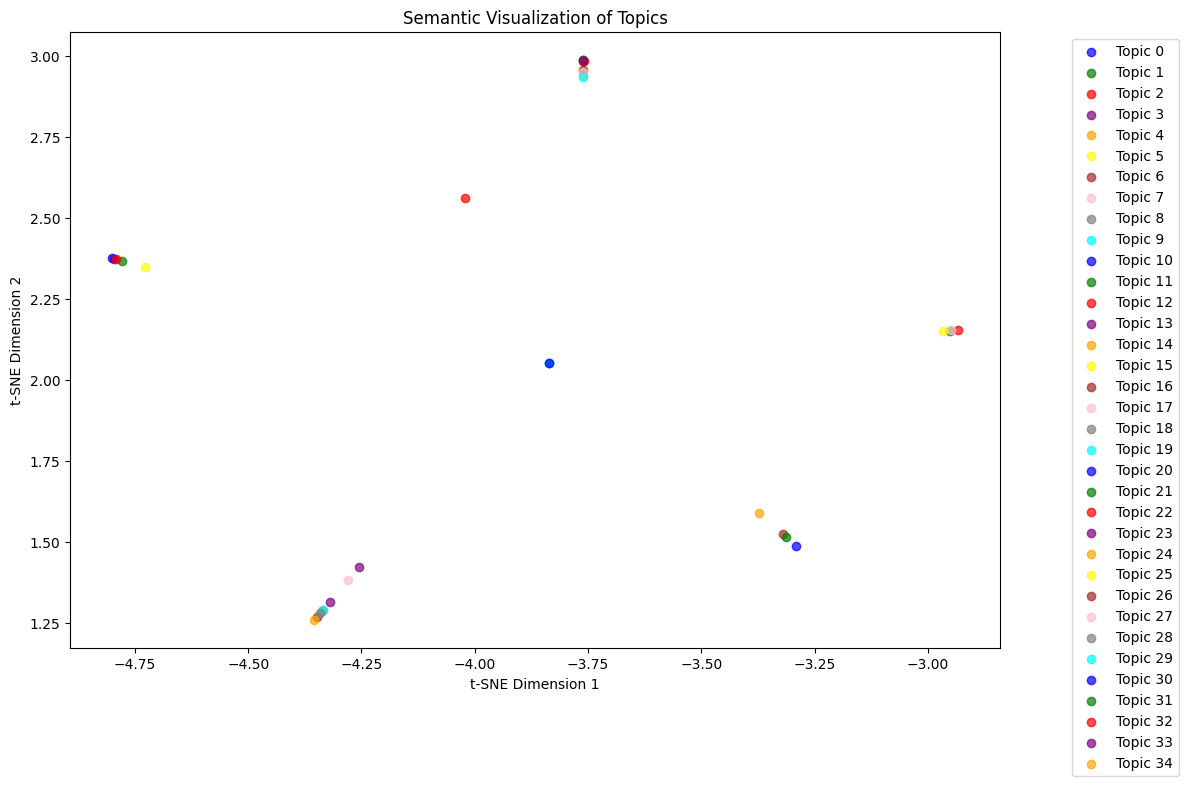

In [59]:
# Subset of topic_matrix for visualization
num_samples = 35

subset_topic_matrix = topic_matrix[:num_samples]

# Fit t-SNE to subset_topic_matrix
tsne = TSNE(n_components=2, random_state=42)
tsne_topics = tsne.fit_transform(subset_topic_matrix)

# Create a scatter plot
plt.figure(figsize=(12, 8))  # Adjust the figsize as needed

# Define a list of colors for each topic
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'grey', 'cyan']

# Scatter plot with labels for each topic
for topic_idx, (x, y) in enumerate(tsne_topics):
    plt.scatter(x, y, color=colors[topic_idx % len(colors)], label=f"Topic {topic_idx}", alpha=0.7)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('Semantic Visualization of Topics')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



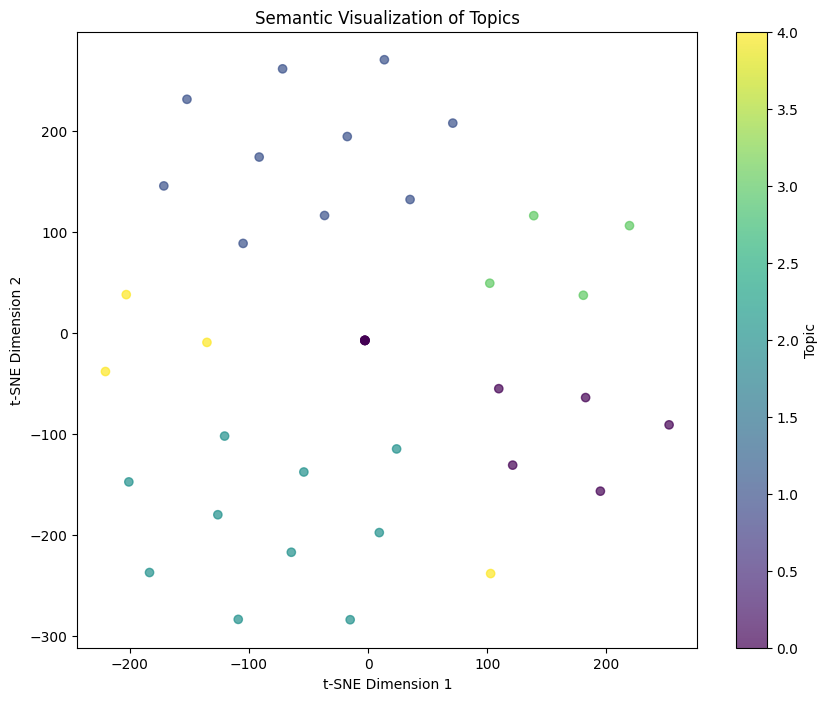

In [60]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
tsne_topics = tsne.fit_transform(topic_matrix)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_topics[:, 0], tsne_topics[:, 1], c=topic_distribution, cmap='viridis', alpha=0.7)
plt.colorbar(label='Topic')
plt.title('Semantic Visualization of Topics')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [61]:

topic_words_df = pd.DataFrame(columns=['Topic', 'Top Words'])

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topic_words = ' '.join(top_words)

    topic_words_df = pd.concat([topic_words_df, pd.DataFrame({'Topic': [f'Topic {topic_idx}'], 'Top Words': [topic_words]})], ignore_index=True)

print(topic_words_df)


     Topic                                          Top Words
0  Topic 0  product value fishery woman fish society progr...
1  Topic 1  opportunity government impact fisherman practi...
2  Topic 2  support fishery financial fisherman fishing fi...
3  Topic 3  scientific method hygiene proper condition dry...
4  Topic 4  fishing product inland due woman district cult...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



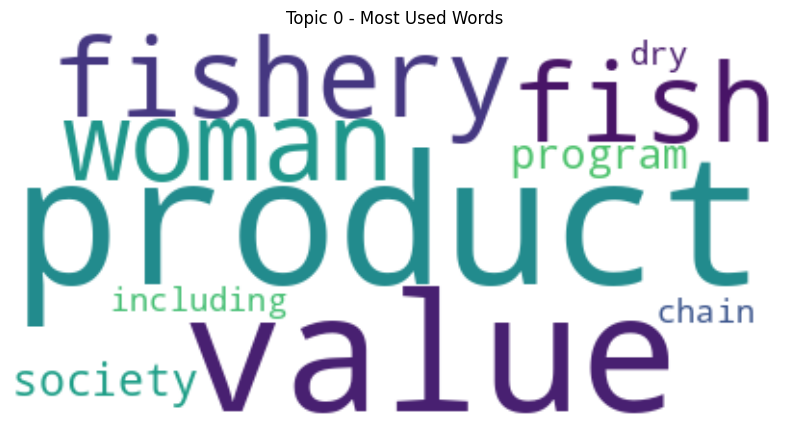

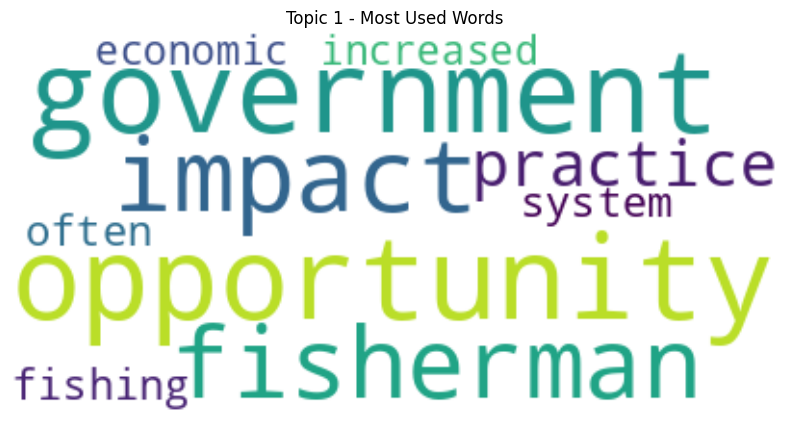

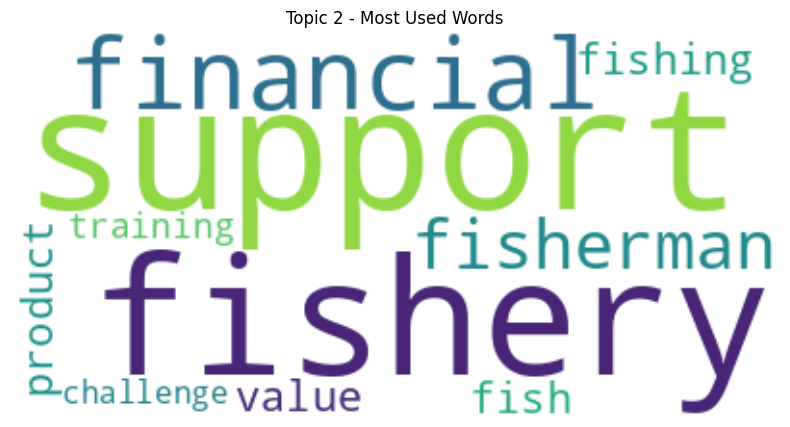

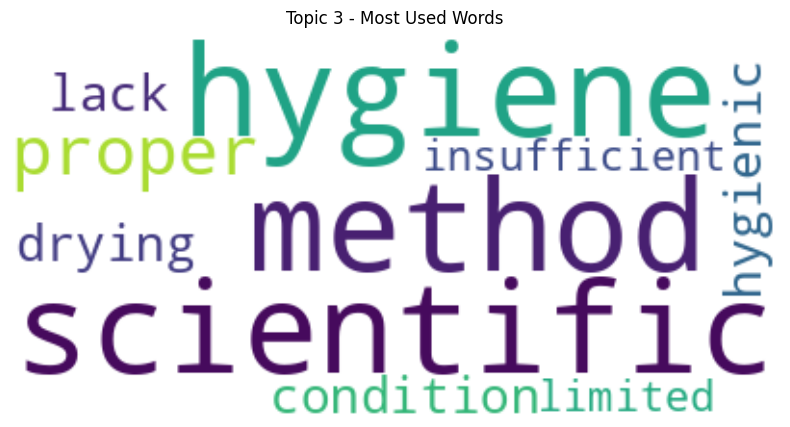

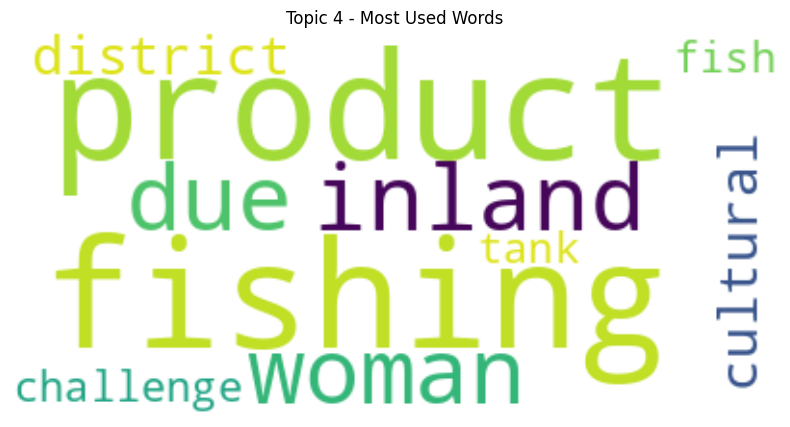

In [62]:
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topic_words = ' '.join(top_words)

    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(topic_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic_idx} - Most Used Words")
    plt.show()